# Quadratic Element for Poisson Equation in 3D

This example is to show the rate of convergence of the linear finite element approximation of the Poisson equation on the unit square:

$$- \Delta u = f \; \hbox{in } (0,1)^3$$

for the following boundary conditions
- Non-empty Dirichlet boundary condition: $u=g_D \hbox{ on }\Gamma_D, \nabla u\cdot n=g_N \hbox{ on }\Gamma_N.$
- Pure Neumann boundary condition: $\nabla u\cdot n=g_N \hbox{ on } \partial \Omega$.
- Robin boundary condition: $g_R u + \nabla u\cdot n=g_N \hbox{ on }\partial \Omega$.

**References**:
- [Quick Introduction to Finite Element Methods](femdoc.html)
- [Introduction to Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf)
- [Progamming of Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch3FEMCode.pdf)

**Subroutines**:

    - Poisson3P2
    - cubePoissonP2
    - femPoisson3
    - Poisson3P2femrate
    
The method is implemented in `Poisson3P2` subroutine and tested in `cubePoissonP2`. Together with other elements (P1, P2,Q1,WG), `femPoisson3` provides a concise interface to solve Poisson equation. The P2 element is tested in `Poisson3P2femrate`. This doc is based on `Poisson3P2femrate`.    

## P2 Quadratic Element

For the quadratic element on a tetrahedron, the local basis functions can be written in terms of barycentric coordinates. The 10 dofs is displayed below. The first 4 are associated to the vertices and 6 to the middle points of 6 edges. 

Given a mesh, the required data structure can be constructured by
        
        [elem2dof,edge,bdDof] = dof3P2(elem)


### Local indexing

The tetrahedron consists of four vertices indexed as [1 2 3 4]. Each tetrahedron contains four faces and six edges. They can be indexed as

    locFace = [2 3 4; 1 4 3; 1 2 4; 1 3 2];
    locEdge = [1 2; 1 3; 1 4; 2 3; 2 4; 3 4];

In `locFace`, the i-th face is opposite to the i-th vertices and the orientation is induced from the tetrahedronthus this is called _opposite indexing_. In `locEdge`, it is the _lexicographic indexing_ which is induced from the lexicographic ordering of the six edges. 

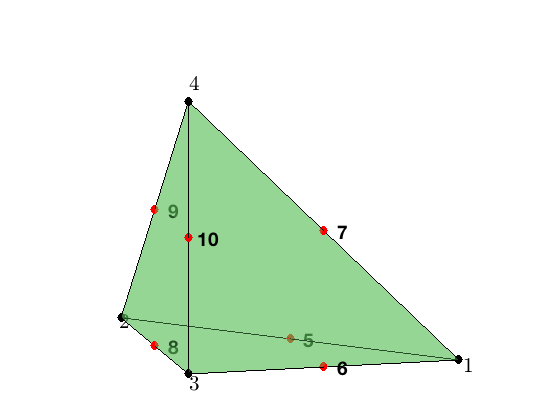

In [2]:
node = [1,0,0; 0,1,0; 0,0,0; 0,0,1];
elem = [1 2 3 4];
locEdge = [1 2; 1 3; 1 4; 2 3; 2 4; 3 4];
showmesh3(node,elem);
view(-14,12);
findnode3(node);
findedgedof3(node,locEdge);

### Boundary dof

When implement boundary conditions, we need to find the d.o.f associated to boundary faces. For example, for Neumann boundary conditions, it can be found by

               bdFace2dof = [elem2dof(bdFlag(:,1) == 2,[2,3,4,10,9,8]); ...  
                             elem2dof(bdFlag(:,2) == 2,[1,4,3,10,6,7]); ...
                             elem2dof(bdFlag(:,3) == 2,[1,2,4,9,7,5]); ...
                             elem2dof(bdFlag(:,4) == 2,[1,3,2,8,5,6])];

### A local basis

The 10 Lagrange-type bases functions are denoted by $\phi_i, i=1:10$. In barycentric coordinates, they are 

$$ \phi_1 = \lambda_1(2\lambda_1 -1),\quad \nabla \phi_1 = \nabla \lambda_1(4\lambda_1-1),$$

$$ \phi_2 = \lambda_2(2\lambda_2 -1),\quad  \nabla \phi_2 = \nabla \lambda_2(4\lambda_2-1),$$ 

$$ \phi_3 = \lambda_3(2\lambda_3 -1),\quad  \nabla \phi_3 = \nabla \lambda_3(4\lambda_3-1),$$ 

$$ \phi_4 = \lambda_4(2\lambda_4 -1),\quad  \nabla \phi_4 = \nabla \lambda_4(4\lambda_4-1),$$ 

$$ \phi_5 = 4\lambda_1\lambda_2,\quad  \nabla\phi_5 = 4\left (\lambda_1\nabla \lambda_2 + \lambda_2\nabla \lambda_1\right )\; ,$$ 

$$ \phi_6 = 4\lambda _1\lambda_3,\quad  \nabla\phi_6 = 4\left (\lambda_1\nabla \lambda_3 + \lambda_3\nabla \lambda_1\right )\; ,$$ 

$$ \phi_7 = 4\lambda _1\lambda_4,\quad  \nabla\phi_7 = 4\left (\lambda_1\nabla \lambda_4 + \lambda_4\nabla\lambda_1\right )\; .$$

$$ \phi_8 = 4\lambda _2\lambda_3,\quad  \nabla\phi_8 = 4\left (\lambda_2\nabla \lambda_3 + \lambda_3\nabla \lambda_2\right )\; ,$$ 

$$ \phi_9 = 4\lambda _2\lambda_4,\quad  \nabla\phi_9 = 4\left (\lambda_2\nabla \lambda_4 + \lambda_4\nabla \lambda_2\right )\; ,$$ 

$$ \phi_{10} = 4\lambda _3\lambda_4,\quad  \nabla\phi_{10} = 4\left (\lambda_3\nabla \lambda_4 + \lambda_4\nabla \lambda_3\right )\; .$$ 


When transfer to the reference triangle formed by $(0,0,0),(1,0,0),(0,1,0),(0,0,1)$, the local bases in x-y-z coordinate can be obtained by substituting 

$$\lambda _1 = x, \quad \lambda _2 = y, \quad \lambda _3 = z, \quad \lambda_4 = 1-x-y-z.$$ 

Unlike 2-D case, to apply uniform refinement to obtain a fine mesh with good mesh quality, a different ordering of the inital mesh, which may violate the positive ordering, should be used. See [3 D Red Refinement](uniformrefine3doc.html).

## Mixed boundary condition

In [1]:
%% Setting
[node,elem] = cubemesh([0,1,0,1,0,1],0.5); 
mesh = struct('node',node,'elem',elem);
option.L0 = 1;
option.maxIt = 3;
option.elemType = 'P2';
option.printlevel = 1;
option.plotflag = 1;

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     4913,  #nnz:    70718, smoothing: (1,1), iter: 12,   err = 2.83e-09,   time = 0.15 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    35937,  #nnz:   659134, smoothing: (1,1), iter: 12,   err = 3.80e-09,   time = 0.44 s
Table: Error
 #Dof       h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  729   2.500e-01   5.00700e-03   1.32387e-01   5.25032e-02   1.21275e-02
 4913   1.250e-01   6.03477e-04   3.52893e-02   9.25606e-03   1.61600e-03
35937   6.250e-02   7.43413e-05   9.04712e-03   1.42917e-03   2.02649e-04

Table: CPU time
 #Dof   Assemble     Solve      Error      Mesh    

  729   1.20e-01   2.00e-02   1.00e-01   1.00e-02
 4913   1.50e-01   1.50e-01   9.00e-02   1.00e-02
35937   9.90e-01   4.37e-01   4.10e-01   9.00e-02



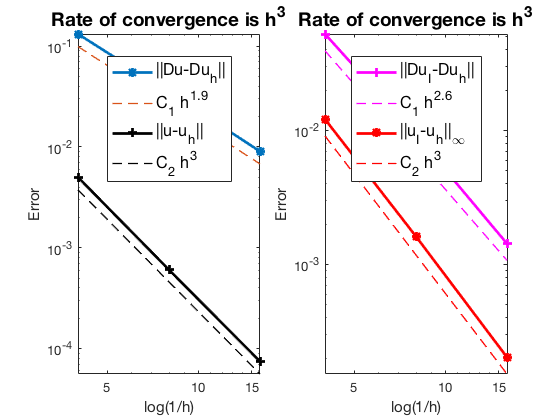

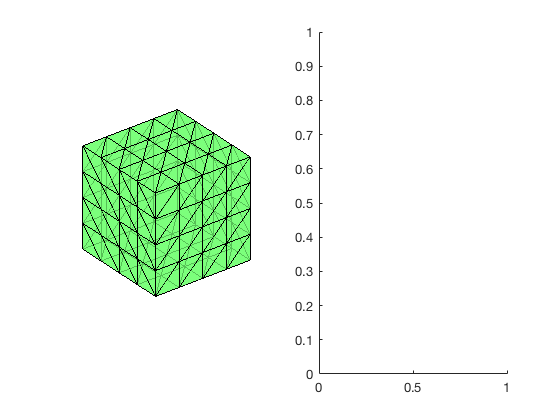

In [3]:
%% Non-empty Dirichlet boundary condition.
pde = sincosdata3;
mesh.bdFlag = setboundary3(node,elem,'Dirichlet','~(x==0)','Neumann','x==0');
femPoisson3(mesh,pde,option);

## Pure Neumann boundary condition

When pure Neumann boundary condition is posed, i.e., $-\Delta u =f$ in $\Omega$ and $\nabla u\cdot n=g_N$ on $\partial \Omega$, the data should be consisitent in the sense that $\int_{\Omega} f \, dx + \int_{\partial \Omega} g \, ds = 0$. The solution is unique up to a constant. A post-process is applied such that the constraint $\int_{\Omega}u_h dx = 0$ is imposed. 

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     4913,  #nnz:   103066, smoothing: (1,1), iter: 14,   err = 3.44e-09,   time = 0.17 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    35937,  #nnz:   792922, smoothing: (1,1), iter: 15,   err = 4.92e-09,   time = 0.41 s
Table: Error
 #Dof       h        ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

  729   2.500e-01   4.51225e-03   1.18653e-01   8.76056e-02   3.82770e-02
 4913   1.250e-01   5.69846e-04   3.35172e-02   1.48497e-02   3.41015e-03
35937   6.250e-02   7.22323e-05   8.82113e-03   2.48250e-03   3.28987e-04

Table: CPU time
 #Dof   Assemble     Solve      Error      Mesh    

  729   1.70e-01   2.00e-02   1.10e-01   1.00e-02
 4913   1.40e-01   1.66e-01   7.00e-02   1.00e-02
35937   9.70e-01   4.13e-01   3.60e-01   8.00e-02



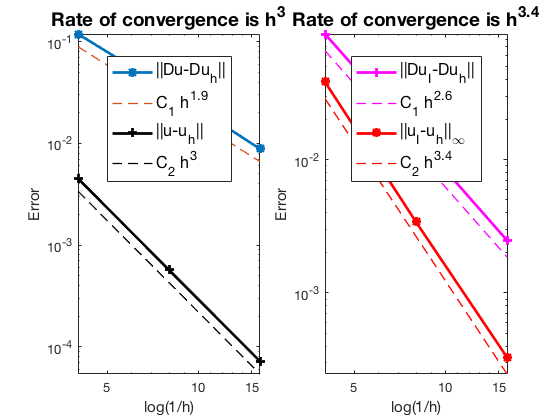

In [3]:
%% Pure Neumann boundary condition.
pde = sincosdata3;
option.plotflag = 0;
mesh.bdFlag = setboundary3(node,elem,'Neumann');
femPoisson3(mesh,pde,option);

## Robin boundary condition

In [5]:
%% Pure Robin boundary condition.
pde = sincosRobindata3;
mesh.bdFlag = setboundary3(node,elem,'Robin');
femPoisson3(mesh,pde,option);

Matrix dimensions must agree.

Error in Poisson3P2 (line 196)
    uc = sum(u.*patchVolume)/sum(volume);

Error in femPoisson3 (line 63)
            [soln,eqn,info] = Poisson3P2(node,elem,bdFlag,pde,option);



## Conclusion

The optimal rate of convergence of the H1-norm (1st order) and L2-norm
(2nd order) is observed. The 2nd order convergent rate between two
discrete functions $\|\nabla (u_I - u_h)\|$ is known as superconvergence.

MGCG converges uniformly in all cases.

TO DO: fix pure Neumann and Robin boundary condition.